In [1]:
import gzip
import json
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DIR = "Dataset"

In [5]:
def load_data(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

In [6]:
def load_data_count(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return count

In [12]:
books = load_data(os.path.join(DIR, 'goodreads_books_comics_graphic.json.gz'),head=None)
# authors = load_data(os.path.join(DIR, 'goodreads_book_authors.json.gz'),head=None)

# interactions = load_data(os.path.join(DIR, 'goodreads_interactions_poetry.json.gz'))
# reviews = load_data(os.path.join(DIR, 'goodreads_reviews_poetry.json.gz'))

In [13]:
for_recommender = True

In [14]:
# load_data_file(os.path.join(DIR, 'ol_dump_ratings_2024-02-29.txt.gz'))

In [15]:
# works = load_data(os.path.join(DIR, 'ol_dump_works_2024-02-29.txt.gz'),head=20000)


In [16]:
# ol_ratings[54]

In [17]:
# display(np.random.choice(interactions))

In [18]:
display(np.random.choice(books))

{'isbn': '0785118764',
 'text_reviews_count': '442',
 'series': ['262316', '290025', '1138011'],
 'country_code': 'US',
 'language_code': 'eng',
 'popular_shelves': [{'count': '4310', 'name': 'to-read'},
  {'count': '647', 'name': 'comics'},
  {'count': '596', 'name': 'graphic-novels'},
  {'count': '237', 'name': 'graphic-novel'},
  {'count': '137', 'name': 'favorites'},
  {'count': '126', 'name': 'young-adult'},
  {'count': '95', 'name': 'superheroes'},
  {'count': '89', 'name': 'fiction'},
  {'count': '81', 'name': 'marvel'},
  {'count': '74', 'name': 'fantasy'},
  {'count': '73', 'name': 'currently-reading'},
  {'count': '67', 'name': 'ya'},
  {'count': '66', 'name': 'comics-graphic-novels'},
  {'count': '51', 'name': 'comic-books'},
  {'count': '45', 'name': 'comic'},
  {'count': '38', 'name': 'graphic-novels-comics'},
  {'count': '37', 'name': 'sci-fi'},
  {'count': '34', 'name': 'superhero'},
  {'count': '33', 'name': 'series'},
  {'count': '32', 'name': 'comics-and-graphic-novel

In [116]:
df_books = pd.DataFrame(books)

In [122]:
drop_cols = ['text_reviews_count', 'country_code',
       'popular_shelves',
       'similar_books', 'link', 'url',
       'image_url']

df_books.drop(drop_cols, inplace=True, axis = 1)

In [123]:
# df_authors

In [124]:
### Cleaning up author info. 

In [125]:
def extract_author_id(data):
    author_id = data[0]['author_id']
    return author_id


def num_authors(data):
    author_num = len(data)
    return author_num

def is_series(data):
    series = len(data)
    return series>0

In [126]:
df_books["primary author"] = df_books["authors"].apply(extract_author_id)
df_books["Num of authors"] = df_books["authors"].apply(num_authors)
df_books["series"] = df_books["series"].apply(is_series)

In [127]:
df_books.drop(["authors","series"], axis =1,inplace=True)

In [128]:
# df_reviews = pd.DataFrame(reviews)

In [129]:
# df_reviews["user_id"].value_counts()

In [130]:
# plt.plot(df_reviews["book_id"].value_counts())
# plt.xlabel('Book')
# plt.ylabel('Count')
# plt.title('Distribution of book reviews')
# plt.show()

In [131]:
# plt.plot(df_reviews["user_id"].value_counts())
# plt.xlabel('User')
# plt.ylabel('Count')
# plt.title('Distribution of User reviews')
# plt.show()

In [132]:
# df_reviews["book_id"].plot()

In [133]:
# df_books["format"].unique(), df_books["language_code"].unique()

We should only keep english reader if we want to use text descripition, I don't think type of english "matters"

Aurthor IDs may not be useful. We can use #books by him before the publication date & avg rating before this date instead. Anything other than that like average rating and all are not a good measure


"Amazon's ASINs are regional website specific, which is why the asin from a mobi file cannot be directly used." - Amazon

### Data Imputation

We haven't done any data imputation but the below functions can be used get more data 

In [3]:
import requests

In [136]:
#Search using titles and compare desc to make sure the book is correct.
## https://www.googleapis.com/books/v1/volumes?q=title:Wedding%20Girl


In [137]:
def check_open_lib(isbn):
#     r = requests.get(f'http://openlibrary.org/api/books?bibkeys=ISBN:{isbn}&jscmd=details&format=json')
    ## also allow http://openlibrary.org/api/volumes/brief/isbn/0596156715.json
    ## https://openlibrary.org/dev/docs/api/read
    r = requests.get(f'http://openlibrary.org/api/volumes/brief/isbn/{isbn}.json')

    res = r.json()
    try:
        details = res[f'ISBN:{isbn}']['details']
    except KeyError:
        return {}
        details['number_of_pages']
    return details

In [138]:
def check_google_books_api(isbn):
    ## they allow non-commerical use. 
    r = requests.get(f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}")
    res = r.json()
    try:
        details = res['items'][0]['volumeInfo']
    except (KeyError, IndexError):
        return {}
        print(details['pageCount'])
    return details


In [145]:
df_books["average_rating"] = df_books["average_rating"].astype(np.float16)
df_books["ratings_count"] = df_books["ratings_count"].astype(np.float16)

c:\users\goyal_92by308\appdata\local\programs\python\python39\lib\site-packages\pandas\core\dtypes\cast.py:1097: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


### filtering books  
1. No rating counts
2. Removing books with no-isbns or isbn13 (no asins included.)
3. Some percentage based on number of ratings


In [147]:
m = df_books["ratings_count"]==np.inf
print("Removing ",m.sum()," values i.e.", m.sum()/m.count()*100," % of the values")
df_books = df_books[~m]

Removing  35  values i.e. 0.039145071635481095  % of the values


In [148]:
if not for_recommender:
    m1 = df_books["isbn"] != ""
    m2 = df_books["isbn13"] != ""
    m = m1|m2
    print("Removing ",m.sum()," values i.e.", m.sum()/m.count()*100," % of the values because of no ISBNs")
    df_books_all_isbns = df_books[m]
else:
    df_books_all_isbns = df_books

some books have same ISBNs but are from different publishers and all. Let's make sure that isbn and isbn13 are unique

These seem ok, same isbns cannot have different publisers, but the book with same title can be present in dataset

In [149]:
m1 = df_books_all_isbns.duplicated(subset=['title'], keep=False)
m2 = df_books_all_isbns['title'].astype(str) != ''
df_books_all_isbns[m1 & m2]

,isbn,language_code,asin,is_ebook,average_rating,kindle_asin,description,format,publisher,num_pages,...,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series,primary author,Num of authors
20,,eng,B009POHJXS,true,4.410156,B009POHJXS,Investigative reporter Spider Jerusalem attack...,,,,...,,,,19115865,58.0,978454,"Transmetropolitan, Vol. 4: The New Scum","Transmetropolitan, Vol. 4: The New Scum",12772,2
25,,en-GB,B007USU8XY,true,3.810547,B007USU8XY,A snowflake that describes the multiverse. A t...,Kindle Edition,Sequart Research & Literacy Organization,,...,4,revised first edition,2012,13605042,11.0,18327915,Keeping the World Strange: A Planetary Guide,Keeping the World Strange: A Planetary Guide,5435058,11
32,1846535859,eng,,false,3.580078,B00P16G50W,The X-Men are shaken to the core by the Battle...,Paperback,Panini Books,116,...,4,,2014,19541857,27.0,25959476,"All-New X-Men, Vol. 4: All-Different","All-New X-Men, Vol. 4: All-Different",12424,3
37,1421584239,,,false,4.281250,B01AB5VAW0,"Yoshida is short, scrawny and generally unattr...",Paperback,SuBLime,175,...,1,,2016,27220737,38.0,45979166,"His Favorite, Vol. 8","His Favorite, Vol. 8",745566,1
45,0785164960,,,false,2.939453,B00PSN1H60,X-Men legend Neal Adams returns to Marvel's mu...,Paperback,Marvel,112,...,9,,2013,17277794,30.0,21738666,First X-Men,First X-Men,61970,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89386,0224064401,eng,,false,4.230469,,"Wise, often funny, sometimes heartbreaking, Pe...",Hardcover,Jonathan Cape,153,...,5,,2003,869979,390.0,3303888,Persepolis: The Story of a Childhood,Persepolis: The Story of a Childhood,6238,1
89397,,eng,B015YX9INC,true,4.078125,B015YX9INC,The second storyline from the Eisner Awardwinn...,,,128,...,,,,27070179,59.0,42769900,"Sex Criminals, Vol. 2: Two Worlds, One Cop","Sex Criminals, Vol. 2: Two Worlds, One Cop",61382,2
89398,1401224687,eng,,false,3.900391,B005CRQ2XU,Forget everything you know about The Man of St...,Hardcover,DC Comics,134,...,11,,2010,7657484,13224.0,10234999,"Superman: Earth One, Volume 1","Superman: Earth One, Volume 1",2689,5
89402,,eng,,false,4.730469,,"""A FULL CONFESSION""\nSolve one murder, uncover...",Mass Market Paperback,,53,...,10,,2016,32598998,3.0,53177155,The Black Monday Murders #3,The Black Monday Murders #3,356424,1


In [150]:
# df_books_all_isbns[df_books_all_isbns["title"] == "Emma"].to_csv("temp.csv")

In [151]:
percentiles = df_books_all_isbns["ratings_count"].quantile([0.1,0.15, 0.2, 0.3,0.4,0.5,0.6])
print("10th percentile:", percentiles[0.1])
print("15th percentile:", percentiles[0.15])
print("20th percentile:", percentiles[0.2])
print("30th percentile:", percentiles[0.3])
print("40th percentile:", percentiles[0.4])
print("50th percentile:", percentiles[0.5])
print("60th percentile:", percentiles[0.6])

10th percentile: 5.0
15th percentile: 7.0
20th percentile: 10.0
30th percentile: 16.0
40th percentile: 26.0
50th percentile: 39.0
60th percentile: 60.0


Based of this let's remove another 20% data (which is ~10) before imputing values to dataset.

In [152]:
## SKIP this for recommendation sys
if not for_recommender:
    m = df_books_all_isbns["ratings_count"] < percentiles[0.2]
    df_books_all_isbns = df_books_all_isbns[~m]
else:
    m = df_books_all_isbns["ratings_count"] < 4 ## we need books with atleast x
    df_books_all_isbns = df_books_all_isbns[~m]
    

In [153]:
#### imputing data about language code and number of pages

### let's see which columns have missing info

from manual inspection, a lot of data where language code missing is eng. Let's map all engish columns to "eng". 

In [154]:
lang_eng = ['eng', '', 'en-US','en-GB', 'en-CA', '--', 'en', 'aus' , 'enm']
df_books_all_isbns.loc[df_books_all_isbns['language_code'].isin(lang_eng), 'language_code'] = 'eng'
df_books_all_isbns["language_code"].unique()

c:\users\goyal_92by308\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array(['fre', 'eng', 'kor', 'jpn', 'spa', 'ita', 'nor', 'ind', 'cze',
       'ben', 'swe', 'ger', 'nl', 'por', 'gre', 'fin', 'rum', 'bos',
       'msa', 'tur', 'per', 'pol', 'hin', 'mul', 'scr', 'tha', 'fil',
       'zho', 'rus', 'bul', 'srp', 'ara', 'nno', 'lav', 'vie', 'pes',
       'cat', 'tgl', 'dan', 'hun', 'est', 'ach', 'kat', 'ira', 'ukr',
       'inh', 'slv', 'lit', 'sco', 'tel', 'slo', 'nob', 'eus', 'abk',
       'ine', 'isl', 'wak', 'iku', 'fiu', 'aze', 'glg', 'dut', 'heb'],
      dtype=object)

In [155]:
cols =  ['language_code', 'is_ebook', 'average_rating', 'description', 'format', 'publisher', 'num_pages',
       'publication_month',
         'edition_information',
       'publication_year', 'ratings_count', 'title',
       'title_without_series', 'primary author', 'Num of authors']

In [156]:
for col in cols:
    m = df_books_all_isbns[col] == ""
    per_data = m.sum()/m.count() * 100
    print(col,":",per_data)


language_code : 0.0
is_ebook : 0.0
average_rating : 0.0
description : 16.83737495667555
format : 24.219861122730695
publisher : 21.598881332839333
num_pages : 26.26357997394557
publication_month : 29.21322800014342
edition_information : 92.53385282833958
publication_year : 20.511288259970602
ratings_count : 0.0
title : 0.0
title_without_series : 0.0
primary author : 0.0
Num of authors : 0.0


In [157]:
df_books_all_isbns.columns

Index(['isbn', 'language_code', 'asin', 'is_ebook', 'average_rating',
       'kindle_asin', 'description', 'format', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series', 'primary author', 'Num of authors'],
      dtype='object')

let's drop columns which have >20% data missing

In [158]:
missing_percentage = (df_books_all_isbns=="").sum() / len(df_books_all_isbns)
missing_percentage*100

isbn                    36.280193
language_code            0.000000
asin                    87.118595
is_ebook                 0.000000
average_rating           0.000000
kindle_asin             64.698641
description             16.837375
format                  24.219861
publisher               21.598881
num_pages               26.263580
publication_day         38.488843
isbn13                  26.176333
publication_month       29.213228
edition_information     92.533853
publication_year        20.511288
book_id                  0.000000
ratings_count            0.000000
work_id                  0.000000
title                    0.000000
title_without_series     0.000000
primary author           0.000000
Num of authors           0.000000
dtype: float64

In [159]:
# Drop columns where missing percentage is greater than 20%
columns_to_drop = missing_percentage[missing_percentage > 0.50].index
df_books_all_isbns.drop(columns=columns_to_drop, inplace=True)

c:\users\goyal_92by308\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now let's drop all the rows with any missing data

In [160]:
x = (df_books_all_isbns=="")
m = x.any(axis = 1)
df_books_all_isbns = df_books_all_isbns[~m]

In [161]:
df_books_all_isbns.columns

Index(['isbn', 'language_code', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'publication_year', 'book_id', 'ratings_count',
       'work_id', 'title', 'title_without_series', 'primary author',
       'Num of authors'],
      dtype='object')

In [162]:
## let's drop random number columns as no data imputing after this point
# cols = ['isbn13', "work_id", "isbn"]
# df_books_all_isbns.drop(cols, axis = 1,inplace=True)

 ### add new feature

1. Author reputation before the book is published

In [163]:
### lets add a new feature, this will represent average rating of the books by author before this book was published.

In [164]:
df_books_all_isbns.columns

Index(['isbn', 'language_code', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'publication_year', 'book_id', 'ratings_count',
       'work_id', 'title', 'title_without_series', 'primary author',
       'Num of authors'],
      dtype='object')

In [165]:

# Sort the DataFrame by author and publication year
df_pubs = df_books_all_isbns[['publisher', 'publication_year',"average_rating"]]  ## month and day may lead data leak.
df_pubs = df_pubs.sort_values(by=['publisher', 'publication_year'])

# Calculate the cumulative sum of ratings and count of books for each author
df_pubs['cumulative_rating'] = df_pubs.groupby('publisher')['average_rating'].cumsum()
df_pubs['cumulative_books'] = df_pubs.groupby('publisher').cumcount() + 1

# Shift the cumulative sum and count by one row to get the values before the current book
df_pubs['previous_rating_sum'] = df_pubs.groupby('publisher')['cumulative_rating'].shift(1)
df_pubs['previous_books_count'] = df_pubs.groupby('publisher')['cumulative_books'].shift(1)

# Calculate the average rating of books by the author before each book was published
df_pubs['previous_average_rating'] = df_pubs['previous_rating_sum'] / df_pubs['previous_books_count']

# Drop the intermediate columns
df_pubs.drop(['cumulative_rating', 'cumulative_books', 'previous_rating_sum', 'previous_books_count'], axis=1, inplace=True)
df_pubs.drop_duplicates(["publisher", "publication_year"], keep="first",inplace=True, ignore_index=True)

In [166]:

# Sort the DataFrame by author and publication year
df_authors = df_books_all_isbns[['primary author', 'publication_year',"average_rating"]]  ## month and day may lead data leak.
df_authors = df_authors.sort_values(by=['primary author', 'publication_year'])

# Calculate the cumulative sum of ratings and count of books for each author
df_authors['cumulative_rating'] = df_authors.groupby('primary author')['average_rating'].cumsum()
df_authors['cumulative_books'] = df_authors.groupby('primary author').cumcount() + 1

# Shift the cumulative sum and count by one row to get the values before the current book
df_authors['previous_rating_sum'] = df_authors.groupby('primary author')['cumulative_rating'].shift(1)
df_authors['previous_books_count'] = df_authors.groupby('primary author')['cumulative_books'].shift(1)

# Calculate the average rating of books by the author before each book was published
df_authors['previous_average_rating'] = df_authors['previous_rating_sum'] / df_authors['previous_books_count']

# Drop the intermediate columns
df_authors.drop(['cumulative_rating', 'cumulative_books', 'previous_rating_sum', 'previous_books_count'], axis=1, inplace=True)
df_authors.drop_duplicates(["primary author", "publication_year"], keep="first",inplace=True, ignore_index=True)

In [167]:
df_authors

,primary author,publication_year,average_rating,previous_average_rating
0,1000576,2008,3.220703,NaN
1,1000576,2011,3.880859,3.410156
2,1000578,2008,3.230469,NaN
3,1000578,2009,3.509766,3.230469
4,1000834,2011,3.439453,NaN
...,...,...,...,...
18357,99888,1996,3.939453,NaN
18358,99929,2011,3.900391,NaN
18359,999522,2015,3.990234,NaN
18360,999522,2016,3.710938,3.990234


In [168]:
df_pubs

,publisher,publication_year,average_rating,previous_average_rating
0,!t Books,2010,4.230469,NaN
1,"""Marvel""",2012,4.089844,NaN
2,001 Edizioni,2009,4.218750,NaN
3,001 Edizioni,2016,3.960938,4.218750
4,01 Publishing,2012,4.500000,NaN
...,...,...,...,...
7446,vorto.pl,2016,4.230469,NaN
7447,zin,2012,3.820312,NaN
7448,ziyunetsuto,2009,3.580078,NaN
7449,ziyunetsuto,2011,3.640625,3.580078


In [169]:
m = df_books_all_isbns["primary author"] == "10000"
df_books_all_isbns[m]

,isbn,language_code,is_ebook,average_rating,description,format,publisher,num_pages,publication_day,isbn13,publication_month,publication_year,book_id,ratings_count,work_id,title,title_without_series,primary author,Num of authors


**Interesting a lot of authors who have multiple publications in a year are writers with stories which have multiple path and are erotic/love based books**

In [170]:
df_books_all_isbns.columns

Index(['isbn', 'language_code', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'publication_year', 'book_id', 'ratings_count',
       'work_id', 'title', 'title_without_series', 'primary author',
       'Num of authors'],
      dtype='object')

In [171]:
df_authors.columns

Index(['primary author', 'publication_year', 'average_rating',
       'previous_average_rating'],
      dtype='object')

In [172]:
df_books_all_isbns.columns

Index(['isbn', 'language_code', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'publication_year', 'book_id', 'ratings_count',
       'work_id', 'title', 'title_without_series', 'primary author',
       'Num of authors'],
      dtype='object')

In [173]:
merged_df = pd.merge(df_authors, df_books_all_isbns[["book_id","publication_year",'primary author']], on='primary author', suffixes=('_author', '_book'))

# Filter rows where publication_year from df_author is less than publication_year from df_books
filtered_df = merged_df[merged_df['publication_year_author'] < merged_df['publication_year_book']]

# Group by primary_author_id and select the maximum publication_year, this doesn't have aurthors who published the book first time.
latest_years = filtered_df.groupby(['primary author',"book_id"]).max().reset_index()[["primary author", "book_id", "previous_average_rating"]]



In [174]:
df_books_author_features = df_books_all_isbns.merge(latest_years,on=["book_id","primary author"],how="left")

In [175]:
df_books_author_features.rename({"previous_average_rating": "Author rating"},axis=1,inplace=True)

In [176]:
df_books_author_features["Author rating"].fillna(df_books_author_features["Author rating"].mean(),inplace=True)

In [177]:
merged_df = pd.merge(df_pubs, df_books_all_isbns[["book_id","publication_year",'publisher']], on='publisher', suffixes=('_pubs', '_book'))

# Filter rows where publication_year from df_author is less than publication_year from df_books
filtered_df = merged_df[merged_df['publication_year_pubs'] < merged_df['publication_year_book']]

# Group by primary_author_id and select the maximum publication_year, this doesn't have aurthors who published the book first time.
latest_years = filtered_df.groupby(['publisher',"book_id"]).max().reset_index()[["publisher", "book_id", "previous_average_rating"]]



In [178]:
df_books_pubs_features = df_books_all_isbns.merge(latest_years,on=["book_id","publisher"],how="left")

In [179]:
df_books_pubs_features.rename({"previous_average_rating": "Publisher rating"},axis=1,inplace=True)

In [180]:
df_books_pubs_features["Publisher rating"].fillna(df_books_pubs_features["Publisher rating"].mean(),inplace=True)

In [181]:
df_books_author_features

,isbn,language_code,is_ebook,average_rating,description,format,publisher,num_pages,publication_day,isbn13,publication_month,publication_year,book_id,ratings_count,work_id,title,title_without_series,primary author,Num of authors,Author rating
0,0930289765,eng,false,4.058594,These are the stories that catapulted Superman...,Hardcover,DC Comics,272,14,9780930289768,11,1997,707611,51.0,693886,"Superman Archives, Vol. 2","Superman Archives, Vol. 2",81563,2,4.006126
1,1933617640,eng,false,3.439453,"Like everyone else in the future, Sui's used t...",Paperback Manga,Go! Comi,206,2,9781933617640,1,2007,2250580,46.0,2256459,"A.I. Revolution, Vol. 1","A.I. Revolution, Vol. 1",1015982,1,4.006126
2,1592912729,eng,false,4.148438,PRODUCT DESCRIPTION: The first new volume of G...,Paperback,Avatar Press,224,26,9781592912728,1,2016,27036536,39.0,47077783,"War Stories, Volume 3","War Stories, Volume 3",14965,4,4.300781
3,1592912737,eng,false,3.160156,Comics horror veteran Mike Wolfer writes and i...,Paperback,Avatar Press,160,8,9781592912735,3,2016,27036537,38.0,47077784,"Crossed, Volume 15","Crossed, Volume 15",24594,1,3.619141
4,1592912753,eng,false,3.509766,Alan Moore s redefining of the Crossed univers...,Paperback,Avatar Press,160,22,9781592912759,3,2016,27036538,44.0,47077785,"Crossed + One Hundred, Volume 2 (Crossed +100 #2)","Crossed + One Hundred, Volume 2 (Crossed +100 #2)",14155472,5,3.683594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35626,1401224687,eng,false,3.900391,Forget everything you know about The Man of St...,Hardcover,DC Comics,134,2,9781401224684,11,2010,7657484,13224.0,10234999,"Superman: Earth One, Volume 1","Superman: Earth One, Volume 1",2689,5,4.101562
35627,1503938999,eng,false,3.769531,Freelance thief-for-hire Asa Ward's latest job...,Paperback,Jet City Comics,128,2,9781503938991,11,2016,30112514,6.0,52359657,Mayhem and Magic,Mayhem and Magic,5752145,4,4.006126
35628,1421526123,eng,false,4.089844,"Student by day, demon hunter by night! R to L ...",Paperback,VIZ Media LLC,192,17,9781421526126,11,2009,6419558,172.0,6608706,"Kekkaishi, Vol. 19 (Kekkaishi, #19)","Kekkaishi, Vol. 19 (Kekkaishi, #19)",8342728,1,4.085227
35629,009952399X,eng,false,4.359375,The Story of a Childhood and The Story of a Re...,Paperback,Vintage,343,6,9780099523994,3,2008,3106983,1966.0,13344769,Persepolis: The Story of a Childhood and The S...,Persepolis: The Story of a Childhood and The S...,6238,2,4.229167


In [182]:
df_books_author_features = df_books_author_features[["book_id","Author rating"]].merge(df_books_pubs_features,on="book_id")

### Converting Normal features to encodings

In [183]:
df_books_author_features.nunique()

book_id                 35631
Author rating            1347
isbn                    35631
language_code              32
is_ebook                    2
average_rating            287
description             34304
format                     72
publisher                2549
num_pages                 683
publication_day            31
isbn13                  35631
publication_month          12
publication_year           58
ratings_count            3180
work_id                 30306
title                   33940
title_without_series    33940
primary author           7319
Num of authors             52
Publisher rating          782
dtype: int64

In [184]:
df_books_author_features.nunique()*100/df_books_all_isbns.shape[0]

book_id                 100.000000
Author rating             3.780416
isbn                    100.000000
language_code             0.089809
is_ebook                  0.005613
average_rating            0.805478
description              96.275715
format                    0.202071
publisher                 7.153883
num_pages                 1.916870
publication_day           0.087003
isbn13                  100.000000
publication_month         0.033679
publication_year          0.162780
ratings_count             8.924813
work_id                  85.055149
title                    95.254133
title_without_series     95.254133
primary author           20.541102
Num of authors            0.145940
Publisher rating          2.194718
dtype: float64

In [185]:
# num_cols = ['publication_day','publication_month', 'publication_year',"is_ebook",'num_pages','Num of authors']
num_cols = ['publication_year',"is_ebook",'num_pages','Num of authors']
float_cols = ["average_rating"]
one_hot_cols = ["language_code",'format']
## cause num of rating wont be present when the books is released

In [186]:
df_books_author_features["is_ebook"]= df_books_author_features["is_ebook"].astype(bool)

In [187]:
df_books_author_features.columns

Index(['book_id', 'Author rating', 'isbn', 'language_code', 'is_ebook',
       'average_rating', 'description', 'format', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'publication_year',
       'ratings_count', 'work_id', 'title', 'title_without_series',
       'primary author', 'Num of authors', 'Publisher rating'],
      dtype='object')

In [188]:
df_books_author_features[df_books_author_features["publication_year"]=='']

,book_id,Author rating,isbn,language_code,is_ebook,average_rating,description,format,publisher,num_pages,...,isbn13,publication_month,publication_year,ratings_count,work_id,title,title_without_series,primary author,Num of authors,Publisher rating


In [189]:
df_books_author_features[num_cols] = df_books_author_features[num_cols].astype(np.int16)
df_books_author_features[float_cols] = df_books_author_features[float_cols].astype(np.float16)

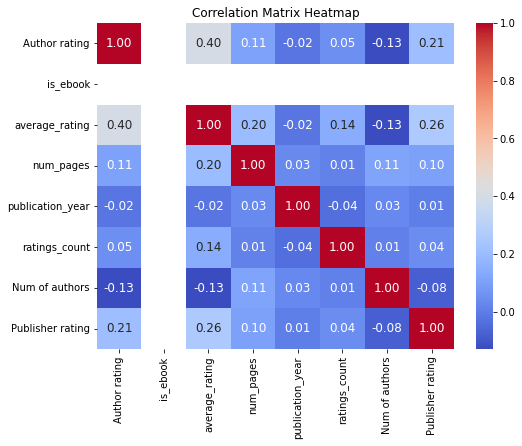

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_books_author_features.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [191]:
cols = df_books_author_features.columns
drop_cols = [col for col in cols if col not in num_cols and col not in one_hot_cols and col not in float_cols]
drop_cols = ['publisher','ratings_count', 'title_without_series',"work_id","isbn13","primary author"]
df_books_author_features.drop(drop_cols,axis=1,inplace=True)

In [192]:
df_books_author_features.columns

Index(['book_id', 'Author rating', 'isbn', 'language_code', 'is_ebook',
       'average_rating', 'description', 'format', 'num_pages',
       'publication_day', 'publication_month', 'publication_year', 'title',
       'Num of authors', 'Publisher rating'],
      dtype='object')

In [193]:
## one hot encoding
df_books_author_features = pd.get_dummies(df_books_author_features, columns=one_hot_cols)


### Including text feautures

In [194]:
embeddings_dict = {}
with open(r"glove.6B/glove.6B.50d.txt", 'r',encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [195]:
m = df_books_author_features["language_code_eng"]==1
df_books_author_features[m].shape[0]/df_books_author_features.shape[0]

0.8651174539025006

In [196]:
df_books_author_features_eng = df_books_author_features[m]

In [197]:
df_books_author_features_eng

,book_id,Author rating,isbn,is_ebook,average_rating,description,num_pages,publication_day,publication_month,publication_year,...,format_Unbound,format_Unknown Binding,format_Vinyl,format_cartonne,format_comic,format_ebook,format_hardcover,format_komitsuku,format_paper,format_paperback
0,707611,4.006126,0930289765,1,4.058594,These are the stories that catapulted Superman...,272,14,11,1997,...,0,0,0,0,0,0,0,0,0,0
1,2250580,4.006126,1933617640,1,3.439453,"Like everyone else in the future, Sui's used t...",206,2,1,2007,...,0,0,0,0,0,0,0,0,0,0
2,27036536,4.300781,1592912729,1,4.148438,PRODUCT DESCRIPTION: The first new volume of G...,224,26,1,2016,...,0,0,0,0,0,0,0,0,0,0
3,27036537,3.619141,1592912737,1,3.160156,Comics horror veteran Mike Wolfer writes and i...,160,8,3,2016,...,0,0,0,0,0,0,0,0,0,0
4,27036538,3.683594,1592912753,1,3.509766,Alan Moore s redefining of the Crossed univers...,160,22,3,2016,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35626,7657484,4.101562,1401224687,1,3.900391,Forget everything you know about The Man of St...,134,2,11,2010,...,0,0,0,0,0,0,0,0,0,0
35627,30112514,4.006126,1503938999,1,3.769531,Freelance thief-for-hire Asa Ward's latest job...,128,2,11,2016,...,0,0,0,0,0,0,0,0,0,0
35628,6419558,4.085227,1421526123,1,4.089844,"Student by day, demon hunter by night! R to L ...",192,17,11,2009,...,0,0,0,0,0,0,0,0,0,0
35629,3106983,4.229167,009952399X,1,4.359375,The Story of a Childhood and The Story of a Re...,343,6,3,2008,...,0,0,0,0,0,0,0,0,0,0


In [198]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [199]:
def sentence_to_vec(sentence):
    """
    Convert a sentence to a vector by averaging its word vectors.
    """
    dim = embeddings_dict["the"].shape[0]
    words = word_tokenize(sentence.lower())
#     stop_words = set(stopwords.words('english'))

    words = [word for word in words if word.isalnum()]
#     vectors = [model[word] for word in words if model.doesnt_match([word]) == False]
    vectors = []

    if len(words)==0:
        print(sentence, words)
        vectors.append(np.zeros(dim))

    for word in words:
        try:
            vectors.append(embeddings_dict[word])
        except KeyError:
            vectors.append(np.zeros(dim))

    s_mean = np.mean(vectors, axis=0)
    assert s_mean.shape[0] == dim
    return s_mean

In [200]:
df_books_author_features_eng["Vdescription"] = df_books_author_features_eng["description"].apply(sentence_to_vec)

.html []
.html []


<ipython-input-200-f162161f3077>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books_author_features_eng["Vdescription"] = df_books_author_features_eng["description"].apply(sentence_to_vec)


In [201]:
df_books_author_features_eng["Vdescription"]

0        [0.3270356, 0.2330691, -0.110652365, -0.126882...
1        [0.29723427, 0.20099656, -0.0888261, -0.153819...
2        [0.3787562, 0.15414847, -0.11322223, -0.150838...
3        [0.35482199728673647, 0.14170668663626368, -0....
4        [0.32950998106155627, 0.22385791273461314, -0....
                               ...                        
35626    [0.1536698756421886, 0.28926618783599767, -0.0...
35627    [0.21773681006785753, -0.12002041313014385, -0...
35628    [0.3097040537876759, 0.14285552792808437, -0.1...
35629    [0.33514294, 0.37037635, -0.36536005, -0.08729...
35630    [0.24428509, 0.29736155, -0.32212666, -0.10880...
Name: Vdescription, Length: 30825, dtype: object

In [202]:
df_books_author_features_eng["Vtitle"] = df_books_author_features_eng["title"].apply(sentence_to_vec)

Spider-Man: 24/7 []
Gantz/9 []
Dawn/Vampirella []
Spider-Women []
Aliens/Vampirella []
¡Sonríe! []
Smoke/Ashes []
1-800-MICE []
X-Men: X-Termination []
Reload/MEK []
Spider-Man: 24/7 []
Ocean/Orbiter []
JLA/Avengers []
X-Infernus []
Cyberforce/Hunter-Killer []
Spider-Men []
Reggie-12 []
B.P.R.D: 1946-1948 []
Spider-Men []
Side-Kicked []
Re-Gifters []
Gantz/4 []
Re-Gifters []
Hit-Monkey []
Spider-Men []
X-Women []
Do-Gooders []
Gantz/12 []
Gantz/37 []
Futurama-O-Rama []
I.D. []
Samejima-Kun & Sasahara-Kun []
Superman/Doomsday: Hunter/Prey []
X-Necrosha []
Gantz/13 []
Spider-Man: Spider-Island []
Hit-Girl []
Gantz/5 []
Kick-Ass []
X-Presidents []
Angel/Dust []
Ex-Con []
Two-Step []
Gantz/17 []
Gantz/16 []
X-Necrosha []
Gantz/2 []
Eisner/Miller []
Grifter/Midnighter []
Gantz/3 []
Gantz/26 []
Drop-In []
I.O.N []
Boy-1 []
Gantz/10 []
X-Men: Apocalypse/Dracula []
Gantz/11 []
X-Men: X-Corps []
Glitz-2-Go []
Joker/Mask []
Circuit-Breaker []
Avengers/Invaders []
15-Love []
Shirahime-Syo []
Gant

<ipython-input-202-8bf9bf53f544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books_author_features_eng["Vtitle"] = df_books_author_features_eng["title"].apply(sentence_to_vec)


In [203]:
df_books_author_features_eng.drop(["description","title"],axis =1, inplace=True)

c:\users\goyal_92by308\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [204]:
df_books_author_features_eng

,book_id,Author rating,isbn,is_ebook,average_rating,num_pages,publication_day,publication_month,publication_year,Num of authors,...,format_Vinyl,format_cartonne,format_comic,format_ebook,format_hardcover,format_komitsuku,format_paper,format_paperback,Vdescription,Vtitle
0,707611,4.006126,0930289765,1,4.058594,272,14,11,1997,2,...,0,0,0,0,0,0,0,0,"[0.3270356, 0.2330691, -0.110652365, -0.126882...","[-0.14603, 0.7142925, 0.269001, 0.1954625, 0.0..."
1,2250580,4.006126,1933617640,1,3.439453,206,2,1,2007,1,...,0,0,0,0,0,0,0,0,"[0.29723427, 0.20099656, -0.0888261, -0.153819...","[-0.59094334, 0.63346666, 0.14800501, 0.125529..."
2,27036536,4.300781,1592912729,1,4.148438,224,26,1,2016,4,...,0,0,0,0,0,0,0,0,"[0.3787562, 0.15414847, -0.11322223, -0.150838...","[0.09751502, 0.45347577, 0.21643876, -0.162666..."
3,27036537,3.619141,1592912737,1,3.160156,160,8,3,2016,1,...,0,0,0,0,0,0,0,0,"[0.35482199728673647, 0.14170668663626368, -0....","[-0.030936, 0.112560995, 0.5811867, -0.3092533..."
4,27036538,3.683594,1592912753,1,3.509766,160,22,3,2016,5,...,0,0,0,0,0,0,0,0,"[0.32950998106155627, 0.22385791273461314, -0....","[0.107121445, 0.2782533, 0.5600229, -0.1884628..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35626,7657484,4.101562,1401224687,1,3.900391,134,2,11,2010,5,...,0,0,0,0,0,0,0,0,"[0.1536698756421886, 0.28926618783599767, -0.0...","[0.22593601, 0.4951686, 0.49040803, 0.14389059..."
35627,30112514,4.006126,1503938999,1,3.769531,128,2,11,2016,4,...,0,0,0,0,0,0,0,0,"[0.21773681006785753, -0.12002041313014385, -0...","[0.08728667, 0.113060005, -0.28417334, 0.28463..."
35628,6419558,4.085227,1421526123,1,4.089844,192,17,11,2009,1,...,0,0,0,0,0,0,0,0,"[0.3097040537876759, 0.14285552792808437, -0.1...","[-0.32222399711608884, 0.4122480034828186, 0.2..."
35629,3106983,4.229167,009952399X,1,4.359375,343,6,3,2008,2,...,0,0,0,0,0,0,0,0,"[0.33514294, 0.37037635, -0.36536005, -0.08729...","[0.37122834, 0.53051084, -0.36788914, -0.03826..."


### Model training

In [205]:
from sklearn.model_selection import train_test_split


In [206]:
y = df_books_author_features_eng["average_rating"]

In [207]:
X = df_books_author_features_eng.drop("average_rating",axis=1)

In [208]:
cols = list(X.columns)
cols.remove('Vdescription')
cols.remove("Vtitle")

In [209]:
X.columns

Index(['book_id', 'Author rating', 'isbn', 'is_ebook', 'num_pages',
       'publication_day', 'publication_month', 'publication_year',
       'Num of authors', 'Publisher rating',
       ...
       'format_Vinyl', 'format_cartonne', 'format_comic', 'format_ebook',
       'format_hardcover', 'format_komitsuku', 'format_paper',
       'format_paperback', 'Vdescription', 'Vtitle'],
      dtype='object', length=116)

In [210]:
# Assuming X['Vtitle'].values is your array of arrays, where each element is a vector of shape (50,)
vector_array = X['Vtitle'].values
Vtitle = np.vstack(vector_array)
vector_array = X["Vdescription"].values
Vdescription = np.vstack(vector_array)


In [211]:
X_final = np.concatenate([X[cols].values,Vtitle,Vdescription], axis=1)

In [212]:
new_cols = cols.copy()
V_t = ["Vtitle " + str(i) for i in range(1,51)]
V_descp = ["Vdescription " + str(i) for i in range(1,51)]

new_cols.extend(V_t)
new_cols.extend(V_descp)


In [213]:
df_book_final_features = pd.DataFrame(X_final,columns=new_cols)

In [214]:
df_book_final_features

,book_id,Author rating,isbn,is_ebook,num_pages,publication_day,publication_month,publication_year,Num of authors,Publisher rating,...,Vdescription 41,Vdescription 42,Vdescription 43,Vdescription 44,Vdescription 45,Vdescription 46,Vdescription 47,Vdescription 48,Vdescription 49,Vdescription 50
0,707611,4.006126,0930289765,1,272,14,11,1997,2,3.725,...,-0.228172,0.080293,-0.020624,0.08334,-0.10243,0.054003,-0.142393,-0.186315,-0.095436,-0.463446
1,2250580,4.006126,1933617640,1,206,2,1,2007,1,4.024352,...,-0.061988,0.155362,0.056955,0.234379,0.086948,0.050219,-0.061491,-0.385843,-0.189563,0.027925
2,27036536,4.300781,1592912729,1,224,26,1,2016,4,3.632911,...,-0.204342,0.043944,0.106733,-0.06399,-0.031067,0.120248,-0.056355,-0.134367,-0.158646,-0.281975
3,27036537,3.619141,1592912737,1,160,8,3,2016,1,3.632911,...,-0.201021,-0.007793,0.075083,0.123313,-0.162441,0.091364,-0.087378,-0.123507,-0.107703,-0.278996
4,27036538,3.683594,1592912753,1,160,22,3,2016,5,3.632911,...,-0.180941,-0.001492,-0.019022,-0.068457,-0.135917,0.123262,-0.076425,-0.120449,-0.071749,-0.158839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30820,7657484,4.101562,1401224687,1,134,2,11,2010,5,3.775281,...,-0.133081,0.140068,-0.106184,-0.120897,-0.057383,0.216026,-0.034754,-0.245912,-0.092759,-0.096165
30821,30112514,4.006126,1503938999,1,128,2,11,2016,4,3.945312,...,-0.167302,0.192913,-0.071128,0.149307,-0.064844,0.068838,-0.062293,-0.121058,0.001789,-0.076237
30822,6419558,4.085227,1421526123,1,192,17,11,2009,1,4.175926,...,-0.184226,0.140651,-0.040405,0.127661,0.14213,0.067853,-0.079409,-0.20986,-0.077939,-0.168078
30823,3106983,4.229167,009952399X,1,343,6,3,2008,2,4.024352,...,-0.100403,0.094065,-0.005422,-0.023786,0.034251,0.163754,-0.105997,-0.137081,-0.032802,-0.23769


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [104]:
from sklearn.metrics import mean_squared_error


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

In [129]:
# Evaluate the model
# Train and evaluate models

### model 
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    rms = mean_squared_error(y_test, y_pred)
    print(f"Model: {name}")
    print("Training R^2 score:", train_score)
    print("Testing R^2 score:", test_score)
    print("RMS:,",rms)
    print('-' * 30)

Model: Linear Regression
Training R^2 score: 0.3108711583876619
Testing R^2 score: 0.31560633822671036
RMS:, 0.07484291461866904
------------------------------
Model: Decision Tree
Training R^2 score: 1.0
Testing R^2 score: -0.22730665198758748
RMS:, 0.13421399422027272
------------------------------
Model: Random Forest
Training R^2 score: 0.9182223747508292
Testing R^2 score: 0.42719077800976113
RMS:, 0.06264042770811476
------------------------------
Model: Support Vector Machine
Training R^2 score: 0.024239479051419766
Testing R^2 score: 0.024406399431689985
RMS:, 0.1066875288714189
------------------------------


((array([8.0000e+00, 2.8000e+01, 1.9400e+02, 8.8900e+02, 4.0810e+03,
         1.2918e+04, 2.1029e+04, 1.3423e+04, 2.3440e+03, 1.3700e+02]),
  array([1.79 , 2.111, 2.432, 2.754, 3.074, 3.395, 3.717, 4.035, 4.36 ,
         4.68 , 5.   ], dtype=float16),
  <BarContainer object of 10 artists>),
 (array([4.0000e+00, 2.9000e+01, 1.9200e+02, 1.1190e+03, 4.8680e+03,
         1.3524e+04, 1.9719e+04, 1.2455e+04, 2.9420e+03, 1.9900e+02]),
  array([2.3087207 , 2.5497998 , 2.79087891, 3.03195801, 3.27303711,
         3.51411621, 3.75519531, 3.99627441, 4.23735352, 4.47843262,
         4.71951172]),
  <BarContainer object of 10 artists>))

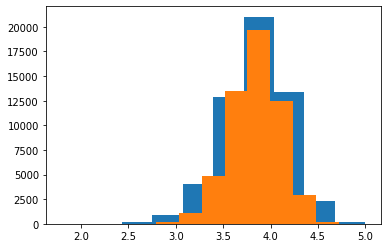

In [107]:
plt.hist(y_train), plt.hist(models["Random Forest"].predict(X_train))

In [108]:
X_test.shape, y_test.shape

((13763, 229), (13763,))

In [109]:
bins = [i/10 for i in range(0,50,2)]

(13763,) (13763,)


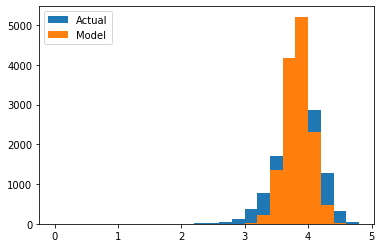

In [110]:
y_pred = models["Random Forest"].predict(X_test)
print(y_pred.shape, y_test.shape)
plt.hist(y_test.values,bins=bins,label="Actual"), plt.hist(y_pred,label="Model",bins=bins)
plt.legend()

In [120]:
X[cols].columns

Index(['Author rating', 'is_ebook', 'num_pages', 'publication_day',
       'publication_month', 'publication_year', 'primary author',
       'Num of authors', 'Publisher rating', 'language_code_afr',
       ...
       'format_Unknown Binding', 'format_broche', 'format_cloth',
       'format_eBook', 'format_ebook', 'format_ebook &amp; paperback',
       'format_ebook and paperback', 'format_komitsuku', 'format_paper',
       'format_paperback'],
      dtype='object', length=129)

In [112]:
from pandas import DataFrame

feature_importances = DataFrame(models["Random Forest"].feature_importances_,
#                                 index = X_train.columns,
                                columns=['importance']).sort_values('importance', ascending=False)


# Rename index ranges and sum their values
feature_importances.index = ['Title' if i < 50 else 'Description' if i < 100 else cols[i-100] for i in feature_importances.index]
feature_importances_sums = feature_importances.groupby(feature_importances.index)['importance'].sum()

feature_importances_sums.index = ["lang_code" if "language_code_" in i else "format" if "format_" in i else i for i in feature_importances_sums.index]
feature_importances_sums = feature_importances_sums.groupby(feature_importances_sums.index).sum()

In [113]:
feature_importances_sums.sort_values(ascending=False)

Title                0.349298
Description          0.303294
Author rating        0.198629
publication_year     0.047951
num_pages            0.046821
Publisher rating     0.021472
primary author       0.019420
format               0.005060
publication_day      0.003684
publication_month    0.003488
Num of authors       0.000882
is_ebook             0.000000
lang_code            0.000000
Name: importance, dtype: float64

In [114]:
one_hot_cols

['language_code', 'format']

In [115]:
mean_squared_error(y_test, [np.mean(y_train.values)]*len(y_test))

0.1094

In [116]:
models["Random Forest"].predict(X_test)

array([3.77892578, 3.62382813, 3.75650391, ..., 3.97994141, 3.51792969,
       3.97806641])

In [117]:
models["Linear Regression"].predict(X_test)

array([3.68322451, 3.82363325, 3.74724009, ..., 3.79183049, 3.79944334,
       3.82219336])

In [118]:
X_train.shape

(55051, 229)

In [124]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor((128,64,32,8),max_iter = 69,random_state=0,verbose=True,learning_rate_init=0.000001)

In [125]:
model.fit(X_train, y_train)


Iteration 1, loss = 6242671501.37491512
Iteration 2, loss = 3897181100.10305786
Iteration 3, loss = 2115340131.28632689
Iteration 4, loss = 964733963.86386371
Iteration 5, loss = 400211285.44375348
Iteration 6, loss = 140735346.84675133
Iteration 7, loss = 41177475.45781907
Iteration 8, loss = 9742304.00979008
Iteration 9, loss = 1816596.29171246
Iteration 10, loss = 253956.55486745
Iteration 11, loss = 25668.55486553
Iteration 12, loss = 2027.61429617
Iteration 13, loss = 350.35945461
Iteration 14, loss = 269.61280013
Iteration 15, loss = 263.72760316
Iteration 16, loss = 260.22488537
Iteration 17, loss = 257.01097423
Iteration 18, loss = 254.04667839
Iteration 19, loss = 251.27907301
Iteration 20, loss = 248.72131730
Iteration 21, loss = 246.37670786
Iteration 22, loss = 244.17430621
Iteration 23, loss = 242.04835873
Iteration 24, loss = 239.89806021
Iteration 25, loss = 237.70870785
Iteration 26, loss = 235.45885208
Iteration 27, loss = 233.00972389
Iteration 28, loss = 230.44736814

c:\users\goyal_92by308\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(128, 64, 32, 8), learning_rate_init=1e-06,
             max_iter=69, random_state=0, verbose=True)

In [126]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

Training R^2 score: -28.145712940459912
Testing R^2 score: -20.049665396099975


In [127]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)


2.3019183227236426

In [ ]:
y_pred

In [ ]:
plt.hist(model.predict(X_test)), plt.hist(y_test.values)

In [ ]:
### Gra

The claims made by this paper: https://philpapers.org/archive/BARPBR-3.pdf are not correct. This paper takes rating count as input which should be a strong indicator of ratings. 

I cannot reproduce the result even with multiple hidden layers. 

In [5]:
### create the df
# avg_rating_df = df_books.sort_values(['average_rating'], ascending=False).head(10)
# avg_rating_df### get df
most_rated = df_books.sort_values('ratings_count', ascending = False).head(10).set_index('title')

### set style
sns.set_style("darkgrid")

### Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 15))

### plot
sns.set_color_codes("pastel")
sns.barplot(most_rated['ratings_count'], most_rated.index, label="Total", color="b")
ax.set(ylabel="Books",xlabel="Rating Counts")
ax.set_title('Top 10 Books Based on User Ratings')


NameError: name 'df_books' is not defined

In [ ]:
most_rated

In [ ]:
df_books

In [ ]:
df_books.plot.scatter(x='publication_month', y='ratings_count')

### Graph Nueral Networks

## Let's look at book-user mapping. 

In [216]:
import networkx as nx
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.optimize import curve_fit
from tqdm import tqdm


In [217]:
interactions = load_data(os.path.join(DIR, 'goodreads_interactions_comics_graphic.json.gz'),head = None)


In [ ]:
df_interactions = pd.DataFrame(interactions)

In [ ]:
m = df_interactions["rating"]==0
m2 = df_interactions["review_text_incomplete"]!=''

In [ ]:
df_interactions[m & m2].shape[0]/df_interactions[m].shape[0]

In [ ]:
df_interactions[m2].shape[0]/df_interactions.shape[0]

In [ ]:
(df_interactions[m2].shape[0]/df_interactions.shape[0])/(df_interactions[m & m2].shape[0]/df_interactions[m].shape[0])

There are a lot of reviews with 0 ratings. There is no way to give 0 ratings.

https://www.goodreads.com/questions/1587805-is-there-a-way-to-give-a-0-star-rating

Most of the reviews with 0 rating have no text reviews. The percentage of reviews with review text and 0 rating is unusally low (19x lower) !!

Therefore we will ignore 0 ratings


In [ ]:
df_interactions = df_interactions[~m].reset_index().drop("index",axis =1)

In [ ]:
plt.hist(df_interactions["rating"],bins=4)

In [ ]:
data = []
m2 = df_interactions["review_text_incomplete"]!=''
for i in range(1,6):
    m = df_interactions["rating"]==i
    rating_with_reviews = df_interactions[m & m2].shape[0]/df_interactions[m].shape[0]
    data.append(rating_with_reviews*100)

plt.title("% text reivews vs ratings")
plt.scatter([i for i in range(1,6)],data)

# Problem as Link prediction 

Poeple with negative review are more than twice more likely to leave a text review than with the higher review

In [124]:
ids = df_interactions["book_id"].unique()

KeyboardInterrupt: 

In [ ]:
cols = ['text_reviews_count', 'country_code', 'language_code', 'is_ebook', 'average_rating', 'format', 'num_pages', 'publication_day',
 'publication_year', 'url','book_id', 'ratings_count', 'work_id', 'title']

In [ ]:
# node_df_books = df_books.merge(df_interactions,on="book_id")[cols]

In [ ]:
# node_df_books.rename({"book_id":"id" },axis=1,inplace=True)

In [ ]:
# node_df_books["type"] = "Book"

Link predicition won't work if user/book has only one rating because if the edge between them is taken in test it like a new book/user


In [ ]:
# Filter user_id and book_id with at least 5 mentions

user_counts = df_interactions['user_id'].value_counts()
book_counts = df_interactions['book_id'].value_counts()
filtered_df = df_interactions[df_interactions['user_id'].isin(user_counts[user_counts >= 6].index) & df_interactions['book_id'].isin(book_counts[book_counts >= 6].index)]


In [ ]:
user_id_mapping = {user_id: index for index, user_id in enumerate(filtered_df['user_id'].unique())}
book_id_mapping = {book_id: index for index, book_id in enumerate(filtered_df['book_id'].unique())}

df_numerical = filtered_df.copy()
df_numerical['user_id'] = df_numerical['user_id'].map(user_id_mapping)
df_numerical['book_id'] = df_numerical['book_id'].map(book_id_mapping)

# Create reverse mappings
user_id_reverse_mapping = {index: user_id for user_id, index in user_id_mapping.items()}
book_id_reverse_mapping = {index: book_id for book_id, index in book_id_mapping.items()}

In [ ]:
df_interactions

In [ ]:
df_interactions = df_numerical

In [ ]:
df_interactions["rating"].describe()

In [ ]:
df_interactions["rating"]= df_interactions["rating"] - 2 ##0,1,2 in -ve classes

In [ ]:
m_p = df_interactions["rating"]>0
df_interactions[m_p].shape, df_interactions[~m_p].shape

In [ ]:
e = list(df_interactions[["book_id","user_id","rating"]].itertuples(index=False, name=None))

In [185]:
# Create a bipartite graph
B = nx.Graph()

# Add nodes with two different sets
top_nodes = df_interactions["user_id"].unique()
bottom_nodes = df_interactions["book_id"].unique()
B.add_nodes_from(top_nodes, bipartite=0)  # Top set
B.add_nodes_from(bottom_nodes, bipartite=1)  # Bottom set

# Add edges between nodes of different sets
B.add_weighted_edges_from(e)

# Draw the bipartite graph
# pos = nx.bipartite_layout(B, top_nodes)
# nx.draw(B, pos, with_labels=True, node_color=['skyblue' if node in top_nodes else 'lightgreen' for node in B.nodes()])

# plt.show()


In [186]:
# get adjacency matrix
A = nx.adjacency_matrix(B)
A = A.toarray()

In [187]:
# Remove 30% of the edges
proportion_edges = 0.3
# this is our test set
edge_subset = random.sample(B.edges(), int(proportion_edges * B.number_of_edges()))
# Create a copy of the graph and remove the edges
G_train = B.copy()
G_train.remove_edges_from(edge_subset)
# adjacency matrix
A_train = nx.adjacency_matrix(G_train)
A_train = A_train.toarray()
# # visualise the train graph
# plt.title("Train Graph")
# nx.draw(G_train, pos, with_labels=False)
# plt.show()

C:\Users\goyal_92by308\AppData\Local\Temp\ipykernel_8064\1799814183.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edge_subset = random.sample(B.edges(), int(proportion_edges * B.number_of_edges()))


In [188]:
G_test = nx.Graph()
G_test.add_edges_from(edge_subset)
# visualise the test graph
# plt.title("Test Graph")
# nx.draw(G_test, pos, with_labels=False)
# plt.show()

### Link prediction in Biparted Graph.

predicting the missing links, holding off some edges (1000) and 
[3,4,5] -> 

Link predicition won't work if user/book has only one rating because if the edge between them is taken in test it like a new book/user

Before we start on Graph neural networks, we need good metrics that should be used to see which models performs well.

The most common metric for recommendation systems are:

1. nDCG / nDCG@k - This creates a normalised score based on the actual order of the prediciton. Since we don't have the order of prediciton we cannot use this. Another argument can be: We do have the total ordering of how users interacted with the book. Can we use this at the true ranking of predictions? Pro: Harry porter one should be ranked after harry porter 2, Cons: It may not capture viral books and all. **The train test split will be based on time here** - this could be imp. but this is slighly different from actually recommending the books to people (opposed to new books).

2. Cumulative Gain: This is one of the components of DCG but doesn't take ranking into consideration. It does need a Relevancy score which can be mapped to "rating" of the book in our case? (the problem with this is more of absolute value of rating as not as important as relative value to rating - This means a user may not give 5* as easily as another user. This 5* would mean a lot more. 

Link prediction is not same as recommendation - because link prediction may work 

Average Precision, Average Recall AUROC kind of metrics does work here

- bipartite links:

In [229]:
"""
Mean Average Precision
"""
def MAP(G_test, G_pred, thres = 0):
    # calculate avePrecision for each node and its neighbors
    avePs = []
    
    # loop through every node
    for node in tqdm(G_test.nodes()):
        # get predicted edges sorted in ranking order
        rankedPredWeights = sorted(G_pred[node].items(), key=lambda x: -x[1]['weight'])
        # only include edges that exist i.e. predicted rank / weight > threshold
        rankedPred = filter(lambda x: x[1]['weight'] > thres, rankedPredWeights)
        # get the rank
        pred = [x[0] for x in rankedPred]
        # calculate rel (existence of predicted edge in the groundtruth/actual set of edges)
        # get groundtruth neighbors
        gt = set(G_test[node])
        rel = np.array([x in gt for x in pred])
        # calculate P accumulative average of precision
        predLength = len(pred)
        P = np.array([
            sum(rel[:i+1])/len(rel[:i+1]) for i in range(predLength)
        ])
        # calculate aveP
        aveP = (rel @ P)/len(gt)
        # keep track of results
        avePs.append(aveP)
    MAPvalue = sum(avePs) / len(avePs)
    print("MAP: {}".format(MAPvalue))
    return MAPvalue


# """
# Visualise Receiver-Operating Characteristic Curve and Precision-Recall Curve
# """
# def ROC_PRC(pred, G):
#     # prediction score
#     y_score = [p[2] for p in pred]
#     # groundtruth label
#     y_true = [G.has_edge(p[0], p[1]) for p in pred]
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     # precision-recall curve
#     fpr, tpr, thresholds = metrics.precision_recall_curve(y_true,  y_score) 
#     ax1.plot(fpr, tpr)
#     ax1.set_title("Precision-Recall Curve")   
#     # receiver-operating characteristic curve
#     fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score) 
#     ax2.plot(fpr, tpr)
#     ax2.set_title("ROC Curve, AUC = {:.2f}".format(metrics.roc_auc_score(y_true, y_score)))
    
#     plt.show()

ref - https://towardsdatascience.com/link-prediction-in-bipartite-graph-ad766e47d75c

Neighbors-based Techniques: like Resource Allssss ocation index, Jaccard Coefficient and Adamic-Adar will not work, as they will try to 
 Adamic-Adar connects more common vertexes through edges. = sum(1/log(degree of common neighbors)) - It will be zero as it needs atleast one common edge. 

Jaccard Coefficient (JAC): Doesn't give any pref to the degree of nodes. Also needs one common neighbour. 

 

In [191]:
for algo in [
    nx.resource_allocation_index,
    nx.jaccard_coefficient,
    nx.adamic_adar_index
]:
    print(algo)
    pred = list(algo(G_train))
    # create graph
    G_pred = nx.Graph()
    G_pred.add_weighted_edges_from(pred)
    # visualise adjacency matrix
    Apred = nx.adjacency_matrix(G_pred)
    Apred = Apred.toarray()
    plt.imshow(Apred, cmap='Greys')
    plt.show()
    # evaluation
    # ROC_PRC(pred, G)
    MAP(G_test, G_pred)

<function resource_allocation_index at 0x000001D3C5E54670>



KeyboardInterrupt



c:\users\goyal_92by308\documents\projects\masters project\myenv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\users\goyal_92by308\documents\projects\masters project\myenv\lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


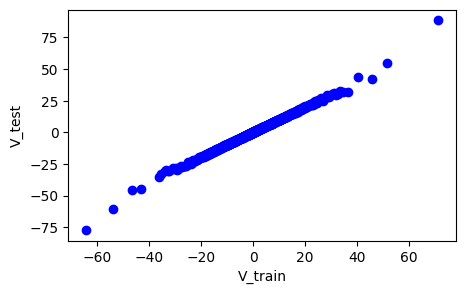

In [192]:
# eigenvalue decomposition
V_train, U_train = np.linalg.eig(A_train)
# U.T * Atest * U
target_V = U_train.T @ A @ U_train
# take only the diagonals
target_V = np.diag(target_V)
# plot the pattern
plt.figure(figsize=(5, 3))
plt.xlabel("V_train")
plt.ylabel("V_test")
plt.scatter(V_train, target_V, c='b')
plt.show()

In [193]:
# odd path counting kernel function
class OddPathCountingKernel:
    def __init__(self):
        self.a1 = 0
        self.a3 = 0
        self.a5 = 0
        self.a7 = 0
        
    def func(self, V, a1, a3, a5, a7):   
        return V * a1 + V**3 * a3 + V**5 * a5 + V**7 * a7
    def fit(self, V_train, target_V):
        # do curve fitting
        popt, pcov = curve_fit(self.func, V_train, target_V)
        self.a1, self.a3, self.a5, self.a7 = popt
    def pred(self, V_train):
        return self.func(V_train, self.a1, self.a3, self.a5, self.a7)


# sinh pseudokernel function
class SinhPseudokernel:
    def __init__(self):
        self.alpha = 0
        
    def func(self, V, alpha):   
        return np.array([
            alpha * (np.exp(lamb) - np.exp(-lamb)) for lamb in V
        ])
    def fit(self, V_train, target_V):
        # do curve fitting
        popt, pcov = curve_fit(self.func, V_train, target_V)
        self.alpha, = popt
    def pred(self, V_train):
        return self.func(V_train, self.alpha)


# odd neumann pseudokernel function
class OddNeumannPseudokernel:
    def __init__(self):
        self.alpha = 0
        
    def func(self, V, alpha):   
        return np.array([
            alpha * (1/(1-lamb) - 1/(1+lamb)) for lamb in V
        ])
    def fit(self, V_train, target_V):
        # do curve fitting
        popt, pcov = curve_fit(self.func, V_train, target_V)
        self.alpha, = popt
    def pred(self, V_train):
        return self.func(V_train, self.alpha)


c:\users\goyal_92by308\documents\projects\masters project\myenv\lib\site-packages\numpy\lib\function_base.py:628: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


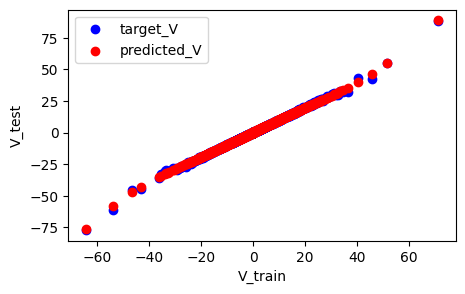

100%|██████████████████████████████████████████████████████████████████████████████| 1962/1962 [04:46<00:00,  6.84it/s]


MAP: 0.030741057333260758


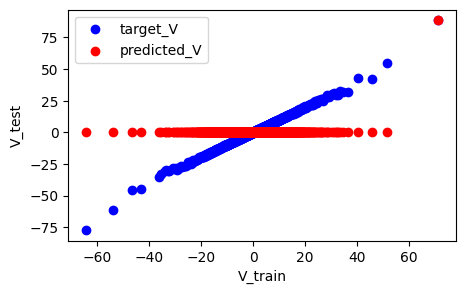

100%|██████████████████████████████████████████████████████████████████████████████| 1962/1962 [05:41<00:00,  5.74it/s]


MAP: 0.04969635951324996


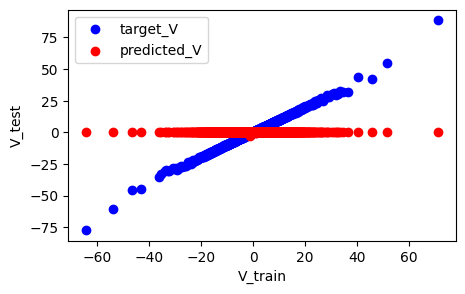

100%|██████████████████████████████████████████████████████████████████████████████| 1962/1962 [04:34<00:00,  7.14it/s]

MAP: 0.0033446380519042106


In [194]:
# fit kernel function
for kernel in [OddPathCountingKernel(), SinhPseudokernel(), OddNeumannPseudokernel()]:
    print(kernel)
    # fit the kernel to the data    
    kernel.fit(V_train, target_V)
    # predict the output
    V_pred = kernel.pred(V_train)
    # assume our function is exponential V_train with alpha = 0.6
    plt.figure(figsize=(5, 3))
    plt.xlabel("V_train")
    plt.ylabel("V_test")
    plt.scatter(V_train, target_V, c='b', label="target_V")
    plt.scatter(V_train, V_pred, c='r', label="predicted_V")
    plt.legend()
    plt.show()
    # transformation
    Apred = U_train @ np.diag(V_pred) @ U_train.T
    Apred = Apred.real
    # make edges of prediction
    pred = [(i, j, Apred[i, j]) for i in range(Apred.shape[0]) for j in range(Apred.shape[1])]
    # create graph
    G_pred = nx.Graph()
    G_pred.add_weighted_edges_from(pred)
    # evaluate MAP and precision
    # ROC_PRC(pred, B)
    MAP(G_test, G_pred)

In [157]:
G_train['18f6b4eac6c40922b9f60489e53f6cb8']

AtlasView({'31944691': {'weight': -2}, '20821284': {'weight': -2}, '13588404': {'weight': -2}, '31426': {'weight': 2}, '160192': {'weight': -2}, '99375': {'weight': -2}, '2547': {'weight': 1}, '91571': {'weight': 2}, '42038': {'weight': 2}, '676': {'weight': -2}, '712511': {'weight': -2}, '27494': {'weight': 3}})

In [155]:
G_test['18f6b4eac6c40922b9f60489e53f6cb8']

AtlasView({'30119': {}, '15793626': {}, '1420': {}, '6036887': {}, '6376233': {}})

Explaination of results:

https://arxiv.org/pdf/1006.5367.pdf

These assumptions are not true:
 - Triangle closing: New edges tend to form triangles.
 - Clustering: Nodes tend to form well-connected clusters in the graph.


Problems with spectral domains:
- O(v^2) Computational & Storage cost
- Parameter size will depend on input graph and is O(V) --> dimension of Adj Matrix
- No use of edge features -



# Recommendation systems

Let's formulate this problem as personalised recommendation systems problem. We would only need the user id in this case. 


- An interesting idea can be recommending good books to the user from a different genre?

- Another idea can be to generate users embedding through Node2Vec. Then use these embeddings in any normal GNN or twin tower models.

- We can convert Bi-partite graph to a homogenous book graph and do something with it. For this we can have a score to measure the number of common Book1->Userx->Book2 we can find and do a wieghted thing. This has good ideas on it.
https://www.slideshare.net/andrgig/recommendation-systems-in-banking-and-financial-services


#### Metrics
This seems easy to do so let's try this. We can get top 3 recommendations for the user based on the last book they bought and then see how many of them were present in his actual recommendations. This should be unranked nDCG. For eg - if someone rates Harry porter 1, and we recomment HP2 then they eventually rate HP2 they should have it

The metrics should be Normal Cummulative Gains without discounting.

Cummulative Gains@K = Number of books the user rated (+vely (exclude not rated and -ves)) out of the first K recommendations that we provide/K


Capturing negative scores: basically if someone dislikes a book, it should be a strong indicator that it shouldn't be recommended to similar user, 

we can try including it and see how rating change as the part of this study.

#### More deatils:

Step 1: So the goal is to convert biparted graph into homogenous graph such if we select a node X, we can a choose "Y" with highed similarity score as X. This doesn't take book features into account 

Steo 2: This similarity score and combine it with book features later. For example if a person like ~300 page books, and the recommendations are of 400,500,600,300 pages, maybe we can give more weightage to 300 page book based on user prefrence. This would require creating a user prefrence embedding vector (by what kinds of books he read in the past - maybe just averaging all books he liked in past). This user embedding vector should be combined with top K * 10 books to give more relevant books. We can do a similarity score to figure out what to choose from top 10k. 

This sounds like a twin tower model :( but this is more explainable on why we are recommending a certain book. 

This design should solve the cold problem for new books too!! because we will only use features that are known during the book release. 

##### Step 1: Book Similarity



$B_{uw}(i,j)$ =  Sum of all possible paths from $(B_i -> B_j)$


 <img src="Images/i1.jpg" width=200>


Book Similarity score should be equal to

$C(U_i)$ = Sum of all edges going from user $U_i$ = Number of times $U_i$ appears in the graph

For we can create our new adj matrix such that

$B_w(i,j)$ =  Sum of all possible paths from $(B_i -> U_x -> B_j)$ / $|C(U_x)|$

This makes sure that each users have the total outgoing wt as one, therefore their contribution to book is scaled.
     
This will be 0 if there is direct path. 

In [506]:
### first let's do train test split based on the date

In [111]:
df_interactions.columns

Index(['user_id', 'book_id', 'review_id', 'is_read', 'rating',
       'review_text_incomplete', 'date_added', 'date_updated', 'read_at',
       'started_at'],
      dtype='object')

In [112]:
K = 10

#### Train-test split

Splitting the data before the date 

We will only condider the data whose book information/embedding  is available

In [ ]:
bids = df_book_final_features[["book_id"]].drop_duplicates()

In [ ]:
## only keeping valid books
df_interactions= df_interactions.merge(bids)

In [ ]:
df_interactions['date_added'] = pd.to_datetime(df_interactions['date_added'])

In [ ]:
# Assuming df_interactions is already loaded
# Convert 'date_added' to datetime

# Sort the DataFrame by 'date_added'
df_interactions_sorted = df_interactions.sort_values(by='date_added')

# Determine the cutoff for the earliest 75% of interactions
cutoff_index = int(len(df_interactions_sorted) * 0.75)

# Split the DataFrame into train and test
train_df = df_interactions_sorted.iloc[:cutoff_index]
test_df = df_interactions_sorted.iloc[cutoff_index:]

In [ ]:
train_df.shape

In [ ]:
test_df.shape

To effectively test our approach, we users should have atleast 1 book in train dataset and k books in test dataset. 

In [ ]:
import pandas as pd

# Step 1: Group by 'user_id' and count books in each dataset
train_counts = train_df.groupby('user_id').size()
test_counts = test_df.groupby('user_id').size()

# Step 2: Identify users meeting the criteria
valid_train_users = train_counts[train_counts >= 1].index
valid_test_users = test_counts[test_counts >= K].index

# Get the intersection of users who meet both criteria
valid_users = valid_train_users.intersection(valid_test_users)

# Step 3: Filter the datasets
train_df_filtered = train_df[train_df['user_id'].isin(valid_users)]
test_df_filtered = test_df[test_df['user_id'].isin(valid_users)]


In [ ]:
## make sure we have same number of user
assert train_df_filtered["user_id"].nunique() == test_df_filtered["user_id"].nunique()

In [ ]:
df_interactions_train = train_df_filtered
df_interactions_test = test_df_filtered

In [ ]:
m = df_interactions_test["rating"]>3
df_interactions_test_postive = df_interactions_test[m]

In [ ]:
df_interactions_train.shape, df_interactions_test.shape

#### Functions for similarity score

In [ ]:
## map 1,2 to the score of -1, 3 to 0 & 4,5 to 1
rating_map = {1: -1, 2: -1, 3: 0, 4: 1, 5: 1}

# Apply the mapping to the 'rating' column
df_interactions_train['weights'] = df_interactions_train['rating'].map(rating_map)

In [ ]:
df_interactions_train["user_id"].nunique()

In [ ]:
df_user_count = df_interactions_train['user_id'].value_counts()

In [ ]:
len(df_user_count)

In [ ]:
df_interactions_train.drop(['review_id', 'is_read', 'rating','review_text_incomplete', 'date_added', 'date_updated', 'read_at','started_at'], axis=1,inplace=True)

In [ ]:
df_score_matrix_raw = df_interactions_train.merge(df_interactions_train,on="user_id")

In [ ]:
df_interactions_train

In [ ]:
## get rid of columns where book_id_x == book_id_y
df_score_matrix_raw = df_score_matrix_raw[df_score_matrix_raw['book_id_x'] != df_score_matrix_raw['book_id_y']]
df_score_matrix_raw["weights_xy"] = (df_score_matrix_raw["weights_x"] + df_score_matrix_raw["weights_y"])/2

In [ ]:
df_score_matrix_raw.drop(["weights_x","weights_y"],axis=1,inplace=True)

Positive scores will say that books are strongly correlated. Negative scores will that these book are not similar at all. 
Since we will be sorting and choosing top K for each book, it will ignore negatives if we have enough connections. 

In [ ]:
df_books_similarity_unwt = df_score_matrix_raw.groupby(['book_id_x', 'book_id_y'])['weights_xy'].sum().reset_index()

In [ ]:
df_uc = pd.DataFrame(df_user_count).reset_index().rename({"user_id":"counts", "index":"user_id"},axis=1)

In [ ]:
df_score_matrix_raw_counts = df_score_matrix_raw.merge(df_uc,on="user_id",how="left")

In [ ]:
m = df_score_matrix_raw_counts["counts"].isna()
df_score_matrix_raw_counts[m]

In [ ]:
df_score_matrix_raw_counts["weights_xy"] = df_score_matrix_raw_counts["weights_xy"]/df_score_matrix_raw_counts["counts"]

In [ ]:
df_books_similarity_wt = df_score_matrix_raw_counts.groupby(['book_id_x', 'book_id_y'])['weights_xy'].sum().reset_index()

In [ ]:
df_books_similarity_wt

In [ ]:
## Now for all scores we will keep only top 10*k books per book to save memory

In [ ]:
top_book_similarity_wt = df_books_similarity_wt.groupby('book_id_x').apply(
    lambda x: x.nlargest(10*K, 'weights_xy')
).reset_index(drop=True)

In [ ]:
top_book_similarity_unwt = df_books_similarity_unwt.groupby('book_id_x').apply(
    lambda x: x.nlargest(10*K, 'weights_xy')
).reset_index(drop=True)

### Eval Metrics

In [ ]:
def evaluate_recommendations(df_pred, df_test):
    """
    Compares recommended books in df_pred with actual books in df_test.

    Args:
    df_pred (pd.DataFrame): DataFrame containing columns 'user_id' and 'recommended_book'.
    df_test (pd.DataFrame): DataFrame containing columns 'user_id' and 'book_id' 
    Returns:
    int: The total count of correctly recommended books.
    """
    # Merge the prediction and test dataframes on 'user_id'
    merged_df = pd.merge(df_pred, df_test, how='inner', left_on=['user_id', 'recommended_book'], right_on=['user_id', 'book_id'])
    successful_recommendations = merged_df.dropna().shape[0]
    return successful_recommendations

### Testing and comparing both types of similarities

for Testing both types of similarities, we can take a user, look at there previous 3 reads: B1, B2, B3. We can look at recommended book (top books) based on B1,2,3 and then see how many did they actually read (which will be our metric).

In [ ]:
df_positive = df_interactions[df_interactions['rating'] > 3]
df_i_x = df_interactions_train.merge(df_positive, on=["user_id","book_id"])

In [ ]:
last_three_books = df_i_x.sort_values(['date_added']).groupby('user_id').tail(10)

In [ ]:
last_three_books = last_three_books[["user_id","book_id"]]

In [ ]:
last_three_books

Now for each user, we get 10k*3 recommendations by combining top 10k with for each of last 3 books

In [ ]:
df_user_recommendations = last_three_books.merge(top_book_similarity_unwt, left_on="book_id", right_on="book_id_x").rename({"book_id_y":"recommended_book"},axis=1)
hits = evaluate_recommendations(df_user_recommendations,df_interactions_test_postive)
hits

In [ ]:
### let's compare if we have to give only K recommendations. How many of these recommendations does the user eventually read.
top_10k_pred = df_user_recommendations.groupby('user_id', group_keys=False).apply(lambda x: x.nlargest(K, 'weights_xy'))
hits = evaluate_recommendations(top_10k_pred,df_interactions_test_postive)
print(hits, hits/top_10k_pred.shape[0])

In [ ]:
df_user_recommendations = last_three_books.merge(top_book_similarity_wt, left_on="book_id", right_on="book_id_x").rename({"book_id_y":"recommended_book"},axis=1)
hits = evaluate_recommendations(df_user_recommendations,df_interactions_test_postive)
hits/df_interactions_test_postive.shape[0]

We can make several improvements here but this is a pretty good score because:
https://paperswithcode.com/sota/recommendation-systems-on-goodreads-comics

this paper acheives (Recall@10, nDCG@10) of (0.1743,0.1927)

In [ ]:
### let's compare if we have to give only K recommendations. How many of these recommendations does the user eventually read.
top_10k_pred = df_user_recommendations.groupby('user_id', group_keys=False).apply(lambda x: x.nlargest(K, 'weights_xy'))
hits = evaluate_recommendations(top_10k_pred,df_interactions_test_postive)
print(hits, hits/top_10k_pred.shape[0])

## Step 2: Making top K better. 

For making top K better, we will calculate the average Embedding of the user.
We will also calculate embedding of each of the metrics, then we will do cosin similarity to find out which is best. 

In [ ]:
### we take all the embeddings from past and average it 

In [ ]:
# average the features of all the users in df_interaction table.

In [ ]:
import numpy as np

def cosine_similarity(vector_a, vector_b):
    # Calculate the dot product of the vectors
    dot_product = np.dot(vector_a, vector_b)
    
    # Calculate the norm of each vector
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    
    # Calculate the cosine similarity
    similarity = dot_product / (norm_a * norm_b)
    
    return similarity

In [ ]:
df_merged = pd.merge(df_interactions_train[["user_id","book_id"]], df_book_final_features, on='book_id', how='inner')

In [ ]:
feature_columns = df_merged.columns[2:]
df_merged[feature_columns] = df_merged[feature_columns].astype(float)
df_user_feature_avg = df_merged.groupby('user_id')[feature_columns].mean().reset_index()


In [ ]:
feature_cols = df_user_feature_avg.columns[2:]

In [ ]:
top_10k_pred = df_user_recommendations.groupby('user_id', group_keys=False).apply(lambda x: x.nlargest(K, 'weights_xy'))
top_10k_pred_features = top_10k_pred[["user_id","recommended_book"]].merge(df_book_final_features, right_on='book_id', left_on="recommended_book",how='inner')

In [ ]:
merged_df = pd.merge(top_10k_pred_features, df_user_feature_avg, on='user_id', suffixes=('_pred', '_avg'))

In [ ]:
merged_df["cs"] = merged_df.apply(lambda row: cosine_similarity(row[[i+"_pred" for i in feature_cols]], row[[i+"_avg" for i in feature_cols]]), axis=1)

In [ ]:
top_k_sim = merged_df.groupby('user_id', group_keys=False).apply(lambda x: x.nlargest(K, 'cs'))

In [ ]:
hits = evaluate_recommendations(top_k_sim,df_interactions_test_postive)
print(hits, hits*100/top_k_sim.shape[0])

In [ ]:
top_k_sim

Pros:
- No cold start for books
- Explainable
    - Books similarity can be updated with relative ease, but that does require keeping the books similarity scores - $O(B^2)$
    - Scable with number of users